In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import pickle
import random
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/semantic/output/distance/distances.csv", index_col=0).reset_index(drop=True)
df_cut = pd.read_csv("../../data/semantic/output/distance/distances_filtered.csv", index_col=0).reset_index(drop=True)

In [3]:
main_node = "Mathematics"
samples = 20
random_state = 16 # 156 # random.randint(13,192)
print(random_state)

# Mathematics 20 samples, random 16
# Art 15-20-25 samples, random 156
# Radio 25 samples, random 19

16


In [4]:
merge_df = df.merge(df_cut, on=["a" , "b"], how="right", suffixes=(None,"_cut"))
merge_df = merge_df[merge_df["a"] == main_node]
merge_df = merge_df.sort_values("distance")
merge_df.head()

,a,b,distance,distance_cut
38195,Mathematics,Geometry,0.058423,0.058423
38084,Mathematics,Applied_mathematics,0.058950,0.058950
38057,Mathematics,Elementary_arithmetic,0.064434,0.064434
38140,Mathematics,Trigonometry,0.064768,0.064768
38136,Mathematics,Arithmetic,0.065257,0.065257


In [5]:
cut_diff_df = merge_df[merge_df["distance"] != merge_df["distance_cut"]]
display(cut_diff_df.head())

,a,b,distance,distance_cut
38128,Mathematics,Pythagoras,0.216408,0.217084
38127,Mathematics,Differential_equation,0.217753,0.140727
38194,Mathematics,Biology,0.560517,0.299977
38157,Mathematics,Sphere,0.590834,0.308733
38126,Mathematics,Red_dwarf,0.619456,0.501447


In [6]:
merge_df = merge_df.sample(samples, random_state=random_state)
red_list = merge_df[merge_df["distance"] != merge_df["distance_cut"]]["b"].to_list()

show_df = merge_df.copy()

# Filter rows where "b" is in the red_list
filtered_rows = merge_df[merge_df["b"].isin(red_list)].copy()

# Update "b" column and "distance" column
filtered_rows["b"] = filtered_rows["b"] + "_CUT"
filtered_rows["distance"] = filtered_rows["distance_cut"]

# Append to show_df
show_df = pd.concat([show_df, filtered_rows], ignore_index=True).sort_values("distance")

# Update green_list
green_list = filtered_rows["b"].tolist()
display(show_df)

,a,b,distance,distance_cut
15,Mathematics,Trigonometric_function,0.097792,0.097792
12,Mathematics,Number,0.134079,0.134079
10,Mathematics,Abacus,0.265735,0.265735
1,Mathematics,Measurement,0.267394,0.267394
17,Mathematics,American_English,0.295357,0.295357
14,Mathematics,Quantum_mechanics,0.309031,0.309031
0,Mathematics,Evolutionarily_stable_strategy,0.324918,0.324918
5,Mathematics,Scheme_programming_language,0.371971,0.371971
8,Mathematics,Dice,0.373870,0.373870
7,Mathematics,Acceleration,0.387365,0.387365


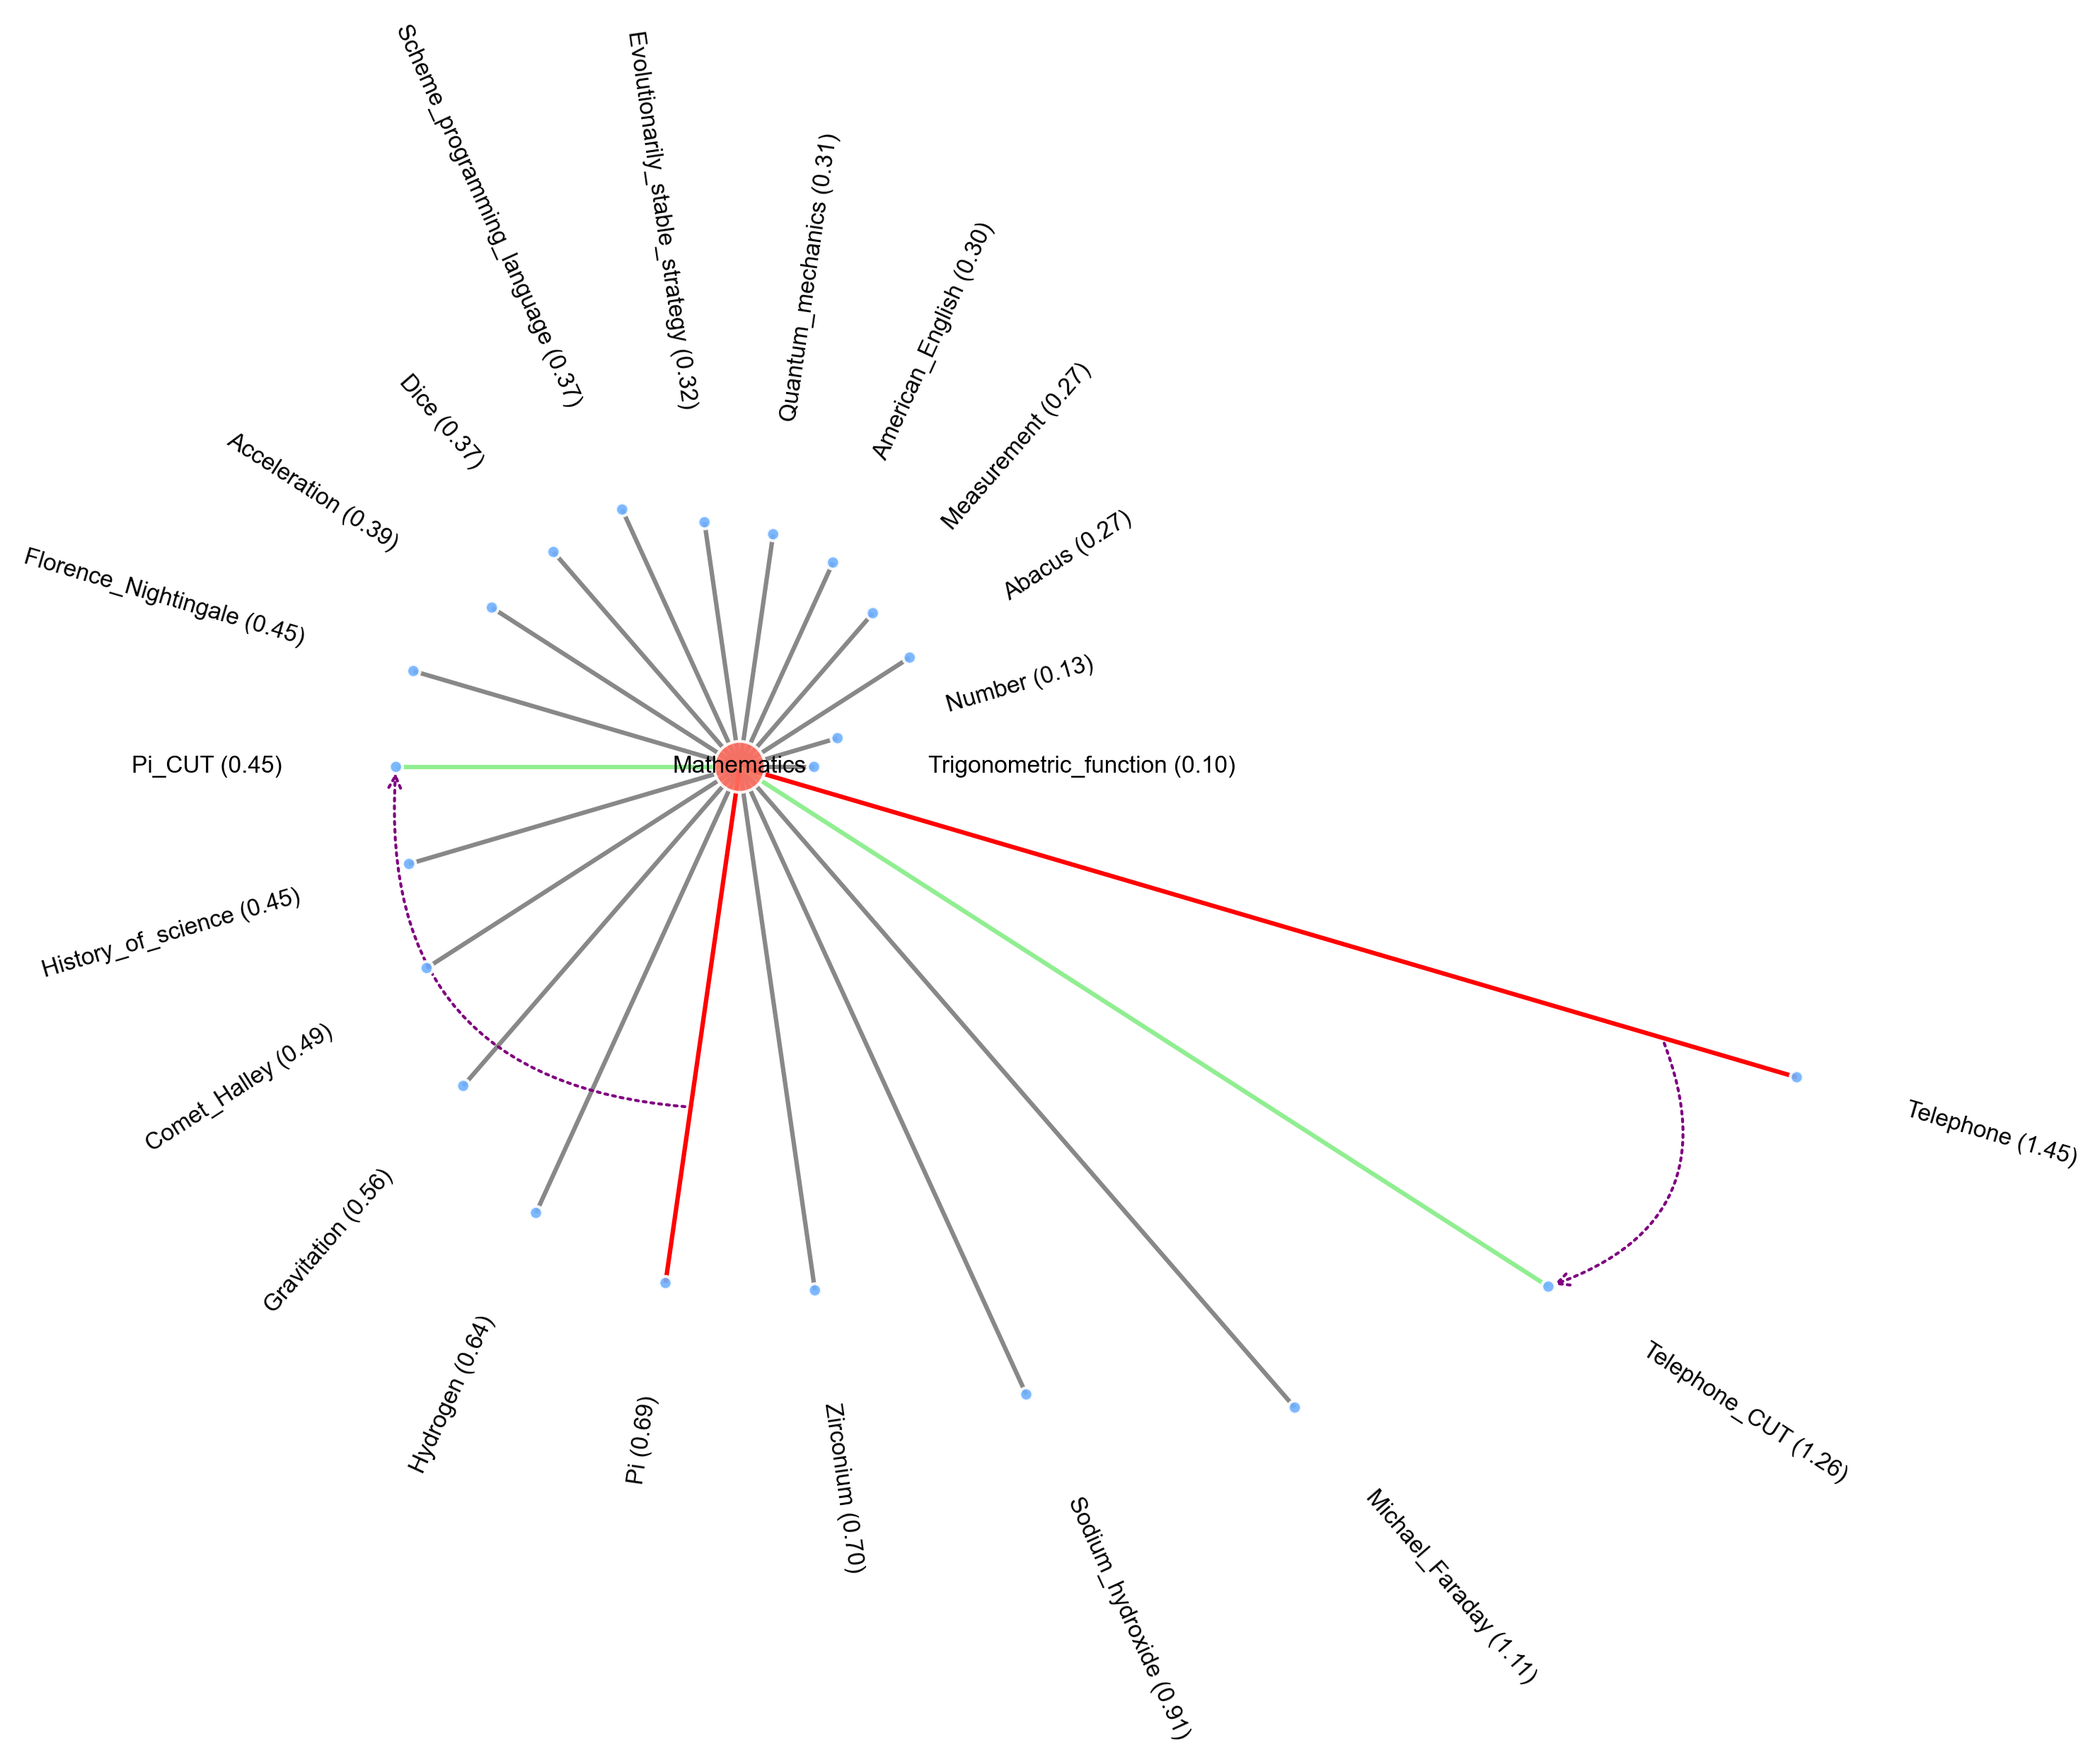

In [7]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, FancyArrowPatch

# Create the graph
G = nx.Graph()
G.add_node(main_node)

for _, row in show_df.iterrows():
    G.add_node(row['b'])
    G.add_edge(main_node, row['b'], weight=row['distance'])

# Position the main node at (0,0) and place nodes radially
distance_scale_factor = 2.0
pos = {main_node: (0, 0)}

num_words = len(show_df)
angles = np.linspace(0, 2 * np.pi, num_words, endpoint=False)

for angle, (_, row) in zip(angles, show_df.iterrows()):
    r = row['distance'] * distance_scale_factor
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    pos[row['b']] = (x, y)

# Split edges into red, green, and normal edges
red_edges = [(main_node, row['b']) for _, row in show_df.iterrows() if row['b'] in red_list]
green_edges = [(main_node, row['b']) for _, row in show_df.iterrows() if row['b'] in green_list]
normal_edges = [(main_node, row['b']) for _, row in show_df.iterrows()
                if row['b'] not in red_list and row['b'] not in green_list]

# Use the requested theme, and a higher DPI for clarity
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Different sizes for main node vs. other nodes
node_sizes = [300 if node == main_node else 20 for node in G.nodes()]
node_colors = ["#FF6F61" if node == main_node else "#6FB1FF" for node in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,
                       alpha=0.9, linewidths=1, edgecolors='white', ax=ax)

# Draw normal, red, and green edges
nx.draw_networkx_edges(G, pos, edgelist=normal_edges, width=1.5, edge_color="#888888", ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, width=1.5, edge_color="red", ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=green_edges, width=1.5, edge_color="lightgreen", ax=ax)

# Draw labels with distance in parentheses
for angle, (_, row) in zip(angles, show_df.iterrows()):
    distance_val = row['distance']
    label_text = f"{row['b']} ({distance_val:.2f})"
    angle_degs = np.degrees(angle)

    # Offset so labels don’t overlap nodes
    offset = 0.3
    r = row['distance'] * distance_scale_factor
    x_offset = (r + offset) * np.cos(angle)
    y_offset = (r + offset) * np.sin(angle)

    # Flip labels for angles in Q2 (90–180) and Q4 (270–360)
    if 90 < angle_degs <= 270:
        rotation = angle_degs + 180
        ha = 'right'
    else:
        rotation = angle_degs
        ha = 'left'

    ax.text(
        x_offset, y_offset, label_text,
        rotation=rotation,
        rotation_mode='anchor',
        fontsize=8,
        color='black',
        va='center', ha=ha
    )



# Draw curved arrows with varying radii and arrowheads
for red_node in red_list:
    green_node = f"{red_node}_CUT"
    if red_node in pos and green_node in pos:  # Ensure both nodes exist
        red_pos = pos[red_node]
        green_pos = pos[green_node]
        # green_angle = np.arctan2(pos[green_node][1], pos[green_node][0])  # Angle of green_pos

        angle_red = np.degrees(np.arctan2(red_pos[1], red_pos[0]))  # Angle of red_pos
        angle_green = np.degrees(np.arctan2(green_pos[1], green_pos[0]))  # Angle of green_pos

        # Normalize angles to ensure shortest path
        angle_red = angle_red % 360
        angle_green = angle_green % 360

        if (angle_green > angle_red) :
            # Determine radius and angles
            base_radius = np.linalg.norm(red_pos)  # Radius

            # Compute the new green position at the same radius but with green angle
            green_pos = (base_radius * np.cos(np.radians(angle_green)),
                        base_radius * np.sin(np.radians(angle_green)))
            
            # Draw arc arrow
            arrow = FancyArrowPatch(
                red_pos, green_pos,
                connectionstyle=f"arc3,rad={np.power(base_radius,1/20)/2}",  # Smaller curvature
                arrowstyle="->", color="purple", lw=1, mutation_scale=10, linestyle=":"
            )            
        else:
            # Determine radius and angles
            base_radius = np.linalg.norm(green_pos)  # Radius

            # Compute the new green position at the same radius but with green angle
            red_pos = (base_radius * np.cos(np.radians(angle_red)),
                        base_radius * np.sin(np.radians(angle_red)))
            
            # Draw arc arrow
            arrow = FancyArrowPatch(
                red_pos, green_pos,
                connectionstyle=f"arc3,rad={-np.power(base_radius,1/20)/2}",  # Smaller curvature
                arrowstyle="->", color="purple", lw=1, mutation_scale=10, linestyle=":"
            )
        ax.add_patch(arrow)


# Label the center node
ax.text(0, 0, main_node, fontsize=8, color="black", ha='center', va='center')

# Final plot settings
ax.set_aspect('equal', 'box')
plt.axis('off')
plt.tight_layout()
plt.show()
